<a href="https://colab.research.google.com/github/bbulla/Airplane-Crashes/blob/main/Desafio_AlgoritmoML_MVP_Bulla_%2B_Diaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importo datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
import sqlite3
import re
%matplotlib inline
from datetime import datetime, timedelta
train=pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv')
test=pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv')
#test


In [ ]:
df= pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv',sep=',', parse_dates=['Date'])
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [ ]:
df = df.rename(columns = {"AC Type":"AC_Type"})

In [ ]:
# Creamos las categorias
Fatalities=['0','Otro']
AC_Type=['Grummand EA-6B','Lockheed L-1011','Mc Donnell Douglas MD-81','Boeing B-747-168B / Ilyushin IL-76TD','Lockheed 1011-200 TriStar','Boeing 777-2H6ER']

#Encoding 

In [ ]:
y = pd.get_dummies(df.Fatalities, prefix= 'AC_Type')
print(y.head())

   AC_Type_0.0  AC_Type_1.0  AC_Type_2.0  AC_Type_3.0  AC_Type_4.0  \
0            0            1            0            0            0   
1            0            1            0            0            0   
2            0            0            0            0            0   
3            0            1            0            0            0   
4            0            0            0            0            0   

   AC_Type_5.0  AC_Type_6.0  AC_Type_7.0  AC_Type_8.0  AC_Type_9.0  ...  \
0            0            0            0            0            0  ...   
1            0            0            0            0            0  ...   
2            1            0            0            0            0  ...   
3            0            0            0            0            0  ...   
4            0            0            0            0            0  ...   

   AC_Type_271.0  AC_Type_275.0  AC_Type_290.0  AC_Type_298.0  AC_Type_301.0  \
0              0              0              0  

In [ ]:
# Creacion de datos artificiales
v_AC_Type=np.random.choice(AC_Type, 1000)
v_Fatalities=np.random.choice(Fatalities, 1000)

In [ ]:
# Creacion del dataframe
df=pd.DataFrame()
df['AC_Type']=v_AC_Type 
df['Fatalities']=v_Fatalities
df.head()

,AC_Type,Fatalities
0,Boeing 777-2H6ER,Otro
1,Lockheed 1011-200 TriStar,Otro
2,Mc Donnell Douglas MD-81,Otro
3,Boeing B-747-168B / Ilyushin IL-76TD,0
4,Boeing 777-2H6ER,Otro


In [ ]:
df.Fatalities.value_counts()

0       518
Otro    482
Name: Fatalities, dtype: int64

In [ ]:
# Split en train y test 
X= df.drop(columns='Fatalities')
y= df['Fatalities']
#from sklearn.preprocessing import OneHotEncoder
X_new=pd.get_dummies(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [ ]:
# Entrenar el arbol
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
y_train.unique()

array(['0', 'Otro'], dtype=object)

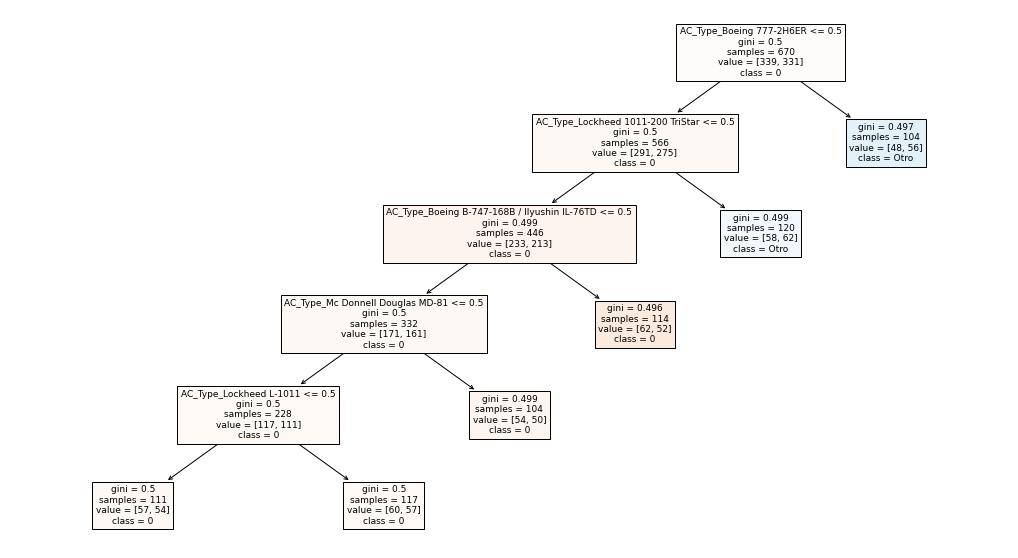

In [ ]:
# Graficando
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(18,10))
_ = tree.plot_tree(clf,feature_names=X_train.columns,  
                   class_names=y_train.unique(),
                   filled=True)

In [ ]:
y_pred= clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       179
        Otro       0.49      0.32      0.39       151

    accuracy                           0.54       330
   macro avg       0.53      0.52      0.51       330
weighted avg       0.53      0.54      0.52       330



#Feature Engineering 

In [ ]:
full= pd.concat([train,test], axis=0)
full.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [ ]:
full['AC Type']

0                               Wright Flyer III
1                                 Wright Byplane
2                                      Dirigible
3                               Curtiss seaplane
4                         Zeppelin L-1 (airship)
                          ...                   
4962    Pilatus-Britten Norman BN-2B-27 Islander
4963             Canadair CL-600-2B16-Challenger
4964                     Sukhoi Superjet-100-95B
4965                               Antonov An-32
4966                    Beechcraft B300 King Air
Name: AC Type, Length: 9934, dtype: object

In [ ]:
import re
full['AC Type'].apply(lambda x : re.sub("(.*, )|(\\..*)", "", str(x)))

0                               Wright Flyer III
1                                 Wright Byplane
2                                      Dirigible
3                               Curtiss seaplane
4                         Zeppelin L-1 (airship)
                          ...                   
4962    Pilatus-Britten Norman BN-2B-27 Islander
4963             Canadair CL-600-2B16-Challenger
4964                     Sukhoi Superjet-100-95B
4965                               Antonov An-32
4966                    Beechcraft B300 King Air
Name: AC Type, Length: 9934, dtype: object

In [ ]:
[]

[]